In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import f_regression
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Fetch the dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579)
#print(myocardial_infarction_complications.head(5))

In [3]:
# Extract features and target data
mi_features = myocardial_infarction_complications.data.features  # Features (X)
mi_targets = myocardial_infarction_complications.data.targets  # Target variable (y)
# print(mi_features)
# print(mi_targets)

In [4]:
# Variable information (e.g., types of variables, feature descriptions)
mi_variables = myocardial_infarction_complications.variables
print("Variables:\n", mi_variables)

#features count for understanding
variable_features_count = mi_variables[mi_variables['role'] == 'Feature']
print(len(variable_features_count))

Variables:
           name     role         type demographic  \
0           ID       ID      Integer        None   
1          AGE  Feature      Integer         Age   
2          SEX  Feature       Binary         Sex   
3     INF_ANAM  Feature  Categorical        None   
4    STENOK_AN  Feature  Categorical        None   
..         ...      ...          ...         ...   
119   DRESSLER   Target       Binary        None   
120        ZSN   Target       Binary        None   
121     REC_IM   Target       Binary        None   
122  P_IM_STEN   Target       Binary        None   
123     LET_IS   Target  Categorical        None   

                                           description units missing_values  
0    Record ID (ID): Unique identifier. Cannot be r...  None             no  
1                                      Age of patient.  None             no  
2                                   0: female, 1: male  None             no  
3    Quantity of myocardial infarctions in the anam

In [5]:
# Check keys in dataset for additional insights
print(f"Keys of myocardial_infarction_complications: {myocardial_infarction_complications.keys()}")
print(f"Keys of myocardial_infarction_complications.data: {myocardial_infarction_complications.data.keys()}")
print(f"Keys of myocardial_infarction_complications.metadata: {myocardial_infarction_complications.metadata.keys()}")
print(f"Keys of myocardial_infarction_complications.variables: {myocardial_infarction_complications.variables.keys()}")

Keys of myocardial_infarction_complications: dict_keys(['data', 'metadata', 'variables'])
Keys of myocardial_infarction_complications.data: dict_keys(['ids', 'features', 'targets', 'original', 'headers'])
Keys of myocardial_infarction_complications.metadata: dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])
Keys of myocardial_infarction_complications.variables: Index(['name', 'role', 'type', 'demographic', 'description', 'units',
       'missing_values'],
      dtype='object')


In [6]:
# Combine features and target into a single DataFrame
combined_data = pd.concat([mi_features, mi_targets], axis=1)
print(combined_data.head())  # Display the first few rows

    AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0         0.0      7.0  ...          0           0         0          0   
1         0.0      0.0  ...          0           0         0          0   
2         0.0      2.0  ...          0           0         0          0   
3         0.0      3.0  ...          0           0         0          0   
4         0.0      7.0  ...          0           0         0          0   

   RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0       0         0    0       0          0       0  
1 

In [7]:
# Displaying the first few rows of the variable details
print(mi_variables.head())

# List all feature names
print(mi_variables['name'].tolist())

        name     role         type demographic  \
0         ID       ID      Integer        None   
1        AGE  Feature      Integer         Age   
2        SEX  Feature       Binary         Sex   
3   INF_ANAM  Feature  Categorical        None   
4  STENOK_AN  Feature  Categorical        None   

                                         description units missing_values  
0  Record ID (ID): Unique identifier. Cannot be r...  None             no  
1                                    Age of patient.  None             no  
2                                 0: female, 1: male  None             no  
3  Quantity of myocardial infarctions in the anam...  None            yes  
4  Exertional angina pectoris in the anamnesis. \...  None            yes  
['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np

In [8]:
#variables according to hypothesis testing results, research paper, and additional variables.
selected_features = ['AGE', 'ZSN', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD',
                   'FK_STENOK', 'IBS_POST', 'SIM_GIPERT', 'IBS_NASL', 'SEX', 'nr_11',
                'nr_01','nr_02','np_01','np_04','IM_PG_P','GIPO_K','RAZRIV','JELUD_TAH','PREDS_TAH',
            'NA_BLOOD', 'KFK_BLOOD', 'AST_BLOOD', 'L_BLOOD','NA_KB', 'OTEK_LANC','FIBR_PREDS', 
            'FIBR_JELUD','DRESSLER', 'REC_IM', 'LET_IS', 'STENOK_AN', 'MP_TP_POST','DLIT_AG', 
            'ritm_ecg_p_04', 'inf_im', 'n_r_ecg_p_08', 'n_p_ecg_p_08', 'K_SH_POST', 'P_IM_STEN']

# Separate continuous and categorical variables
continuous_vars = combined_data[selected_features].select_dtypes(include=['float64']).columns.tolist()
categorical_vars = combined_data[selected_features].select_dtypes(include=['int64']).columns.tolist()

# Identify float64 columns with a small number of unique values (potentially categorical)
potential_categorical_from_continuous = [col for col in continuous_vars if combined_data[col].nunique() < 10]

# Move these to the categorical variables list
for col in potential_categorical_from_continuous:
    continuous_vars.remove(col)
    categorical_vars.append(col)

print("Continuous Variables:", continuous_vars)
print("***************************************")
print("Categorical Variables:", categorical_vars)

Continuous Variables: ['AGE', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'AST_BLOOD', 'L_BLOOD']
***************************************
Categorical Variables: ['ZSN', 'SEX', 'RAZRIV', 'JELUD_TAH', 'PREDS_TAH', 'OTEK_LANC', 'FIBR_PREDS', 'FIBR_JELUD', 'DRESSLER', 'REC_IM', 'LET_IS', 'P_IM_STEN', 'FK_STENOK', 'IBS_POST', 'SIM_GIPERT', 'IBS_NASL', 'nr_11', 'nr_01', 'nr_02', 'np_01', 'np_04', 'IM_PG_P', 'GIPO_K', 'KFK_BLOOD', 'NA_KB', 'STENOK_AN', 'MP_TP_POST', 'DLIT_AG', 'ritm_ecg_p_04', 'inf_im', 'n_r_ecg_p_08', 'n_p_ecg_p_08', 'K_SH_POST']


In [9]:
# Check for missing values in continuous variables
missing_values = combined_data[selected_features].isnull().sum()
# Print the result
print(missing_values)
#print(combined_data[selected_features])

AGE                 8
ZSN                 0
S_AD_ORIT         267
D_AD_ORIT         267
K_BLOOD           371
FK_STENOK          73
IBS_POST           51
SIM_GIPERT          8
IBS_NASL         1628
SEX                 0
nr_11              21
nr_01              21
nr_02              21
np_01              18
np_04              18
IM_PG_P             1
GIPO_K            369
RAZRIV              0
JELUD_TAH           0
PREDS_TAH           0
NA_BLOOD          375
KFK_BLOOD        1696
AST_BLOOD         285
L_BLOOD           125
NA_KB             657
OTEK_LANC           0
FIBR_PREDS          0
FIBR_JELUD          0
DRESSLER            0
REC_IM              0
LET_IS              0
STENOK_AN         106
MP_TP_POST         14
DLIT_AG           248
ritm_ecg_p_04     152
inf_im             80
n_r_ecg_p_08      115
n_p_ecg_p_08      115
K_SH_POST          15
P_IM_STEN           0
dtype: int64


In [10]:
#missing value percentage
print(combined_data[selected_features].shape)
missing_column_percentage = combined_data[selected_features].isnull().mean() * 100
print(missing_column_percentage)

(1700, 40)
AGE               0.470588
ZSN               0.000000
S_AD_ORIT        15.705882
D_AD_ORIT        15.705882
K_BLOOD          21.823529
FK_STENOK         4.294118
IBS_POST          3.000000
SIM_GIPERT        0.470588
IBS_NASL         95.764706
SEX               0.000000
nr_11             1.235294
nr_01             1.235294
nr_02             1.235294
np_01             1.058824
np_04             1.058824
IM_PG_P           0.058824
GIPO_K           21.705882
RAZRIV            0.000000
JELUD_TAH         0.000000
PREDS_TAH         0.000000
NA_BLOOD         22.058824
KFK_BLOOD        99.764706
AST_BLOOD        16.764706
L_BLOOD           7.352941
NA_KB            38.647059
OTEK_LANC         0.000000
FIBR_PREDS        0.000000
FIBR_JELUD        0.000000
DRESSLER          0.000000
REC_IM            0.000000
LET_IS            0.000000
STENOK_AN         6.235294
MP_TP_POST        0.823529
DLIT_AG          14.588235
ritm_ecg_p_04     8.941176
inf_im            4.705882
n_r_ecg_p_08     

In [11]:
# Drop columns with more than 20% missing values
threshold = 0.2
combined_data_cleaned = combined_data[selected_features].dropna(thresh=int((1-threshold)*len(combined_data[selected_features])), axis=1)
print(combined_data_cleaned.shape)

(1700, 34)


In [12]:
# Impute missing numerical columns with the median
for col in continuous_vars:
    if col in combined_data_cleaned.columns:  # Check if the column exists
        combined_data_cleaned[col] = combined_data_cleaned[col].fillna(combined_data_cleaned[col].median())

# Impute missing categorical columns with the mode (most frequent value)
for col in categorical_vars:
    if col in combined_data_cleaned.columns:  # Check if the column exists
        combined_data_cleaned[col] = combined_data_cleaned[col].fillna(combined_data_cleaned[col].mode()[0])

# Verify after imputation
print(combined_data_cleaned.isnull().sum())  # Should show 0 for all columns


AGE              0
ZSN              0
S_AD_ORIT        0
D_AD_ORIT        0
FK_STENOK        0
IBS_POST         0
SIM_GIPERT       0
SEX              0
nr_11            0
nr_01            0
nr_02            0
np_01            0
np_04            0
IM_PG_P          0
RAZRIV           0
JELUD_TAH        0
PREDS_TAH        0
AST_BLOOD        0
L_BLOOD          0
OTEK_LANC        0
FIBR_PREDS       0
FIBR_JELUD       0
DRESSLER         0
REC_IM           0
LET_IS           0
STENOK_AN        0
MP_TP_POST       0
DLIT_AG          0
ritm_ecg_p_04    0
inf_im           0
n_r_ecg_p_08     0
n_p_ecg_p_08     0
K_SH_POST        0
P_IM_STEN        0
dtype: int64


In [13]:
# Check for duplicates and print the count of duplicates before removal
duplicates_combined_data = combined_data_cleaned.duplicated().sum()  # Check for duplicates
print(f"\nNumber of duplicates before removal: {duplicates_combined_data}")

# Remove duplicates
combined_data_cleaned = combined_data_cleaned.drop_duplicates()  # Remove duplicates

# After removing duplicates, check how many duplicates remain
duplicates_combined_data_after = combined_data_cleaned.duplicated().sum()  # Check for duplicates again
print(f"Number of duplicates after removal: {duplicates_combined_data_after}")



Number of duplicates before removal: 1
Number of duplicates after removal: 0


In [14]:
print(combined_data_cleaned.shape)

(1699, 34)


In [15]:
columns = combined_data_cleaned.columns
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Detect and count outliers for each continuous variable
outlier_dict = {}
for col in columns:
    outliers = detect_outliers_iqr(combined_data_cleaned, col)
    outlier_dict[col] = len(outliers)

# Print outliers count per variable
print(outlier_dict)

# Remove outliers for each continuous variable
cleaned_data = combined_data_cleaned.copy()
for col in columns:
    cleaned_data = remove_outliers_iqr(combined_data_cleaned, col)

# The cleaned_data DataFrame now has the outliers removed
print(f"Shape of the cleaned dataset: {cleaned_data.shape}")

print(cleaned_data.isnull().sum())


{'AGE': 3, 'ZSN': 394, 'S_AD_ORIT': 96, 'D_AD_ORIT': 246, 'FK_STENOK': 0, 'IBS_POST': 0, 'SIM_GIPERT': 57, 'SEX': 0, 'nr_11': 42, 'nr_01': 4, 'nr_02': 19, 'np_01': 2, 'np_04': 3, 'IM_PG_P': 50, 'RAZRIV': 54, 'JELUD_TAH': 42, 'PREDS_TAH': 20, 'AST_BLOOD': 107, 'L_BLOOD': 78, 'OTEK_LANC': 159, 'FIBR_PREDS': 170, 'FIBR_JELUD': 71, 'DRESSLER': 75, 'REC_IM': 159, 'LET_IS': 271, 'STENOK_AN': 0, 'MP_TP_POST': 114, 'DLIT_AG': 0, 'ritm_ecg_p_04': 23, 'inf_im': 0, 'n_r_ecg_p_08': 4, 'n_p_ecg_p_08': 7, 'K_SH_POST': 46, 'P_IM_STEN': 147}
Shape of the cleaned dataset: (1552, 34)
AGE              0
ZSN              0
S_AD_ORIT        0
D_AD_ORIT        0
FK_STENOK        0
IBS_POST         0
SIM_GIPERT       0
SEX              0
nr_11            0
nr_01            0
nr_02            0
np_01            0
np_04            0
IM_PG_P          0
RAZRIV           0
JELUD_TAH        0
PREDS_TAH        0
AST_BLOOD        0
L_BLOOD          0
OTEK_LANC        0
FIBR_PREDS       0
FIBR_JELUD       0
DRESSLER 

In [16]:
#Code for K-means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'AGE' is the target variable (binary mortality: 1 or 0)
X = cleaned_data.drop('AGE', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Binary clusters (mortality vs survival)
kmeans.fit(X_scaled)

# Evaluate clustering (using silhouette score or accuracy if true labels are available)
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.684210870344008


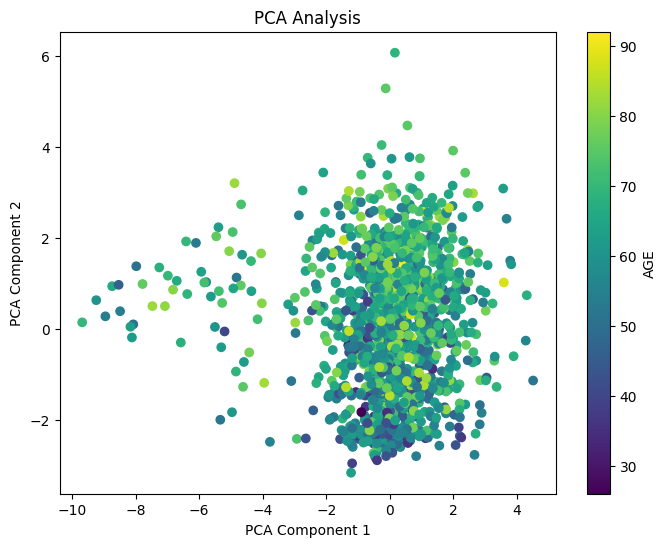

In [18]:
#Code for PCA and Evaluation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'AGE' is the target variable
X = cleaned_data.drop('AGE', axis=1)
y = cleaned_data['AGE']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Analysis')
plt.colorbar(label='AGE')
plt.show()


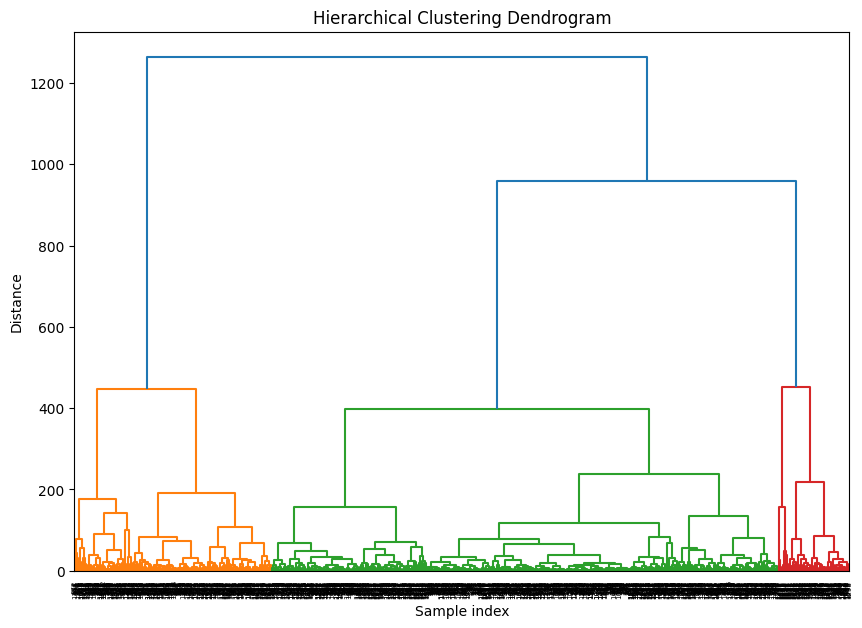

In [19]:
#Code for Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming X contains the features (and not the target variable)
X = cleaned_data.drop('AGE', axis=1)

# Apply Hierarchical Clustering (linkage matrix)
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



<Figure size 640x480 with 0 Axes>

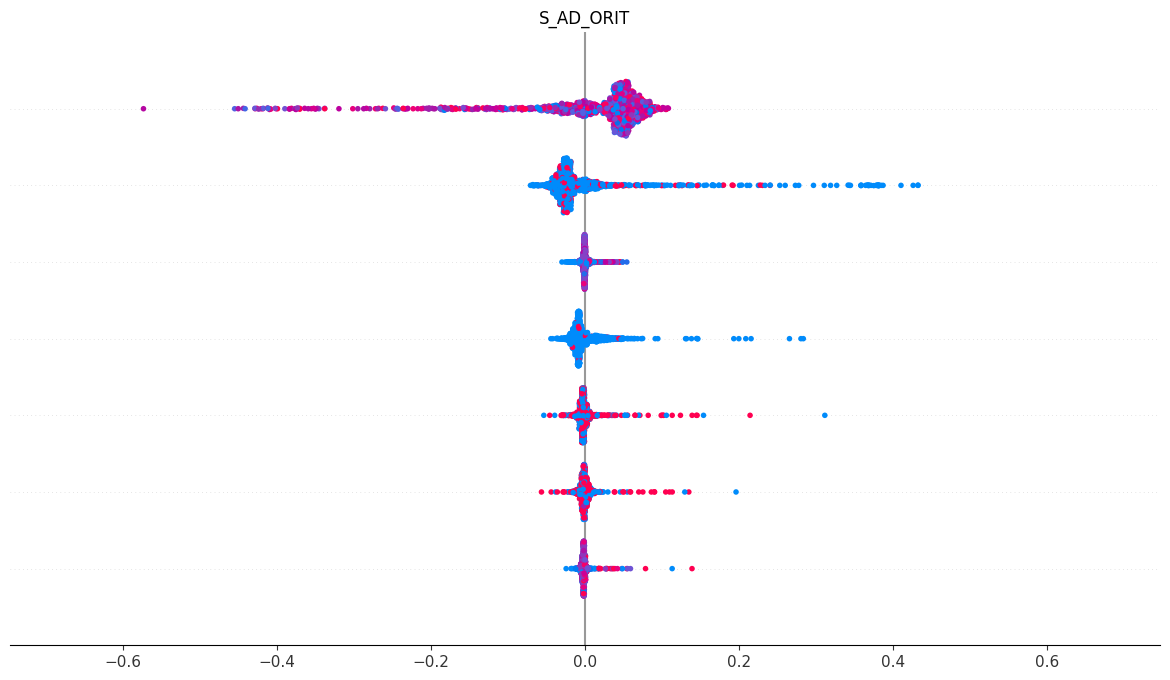

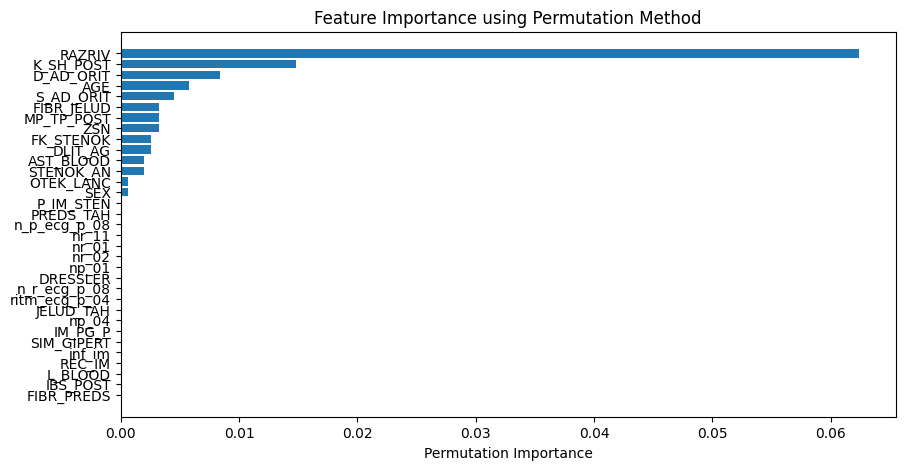

In [20]:

import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target variable (LET_IS = Mortality Indicator)
X = cleaned_data.drop(columns=['LET_IS'])  # Exclude target variable
y = cleaned_data['LET_IS']

#print(cleaned_data.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Continuous Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# SHAP Values using TreeExplainer for Random Forest model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_scaled)

# Plot SHAP Summary
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

# Permutation Importance
perm_importance = permutation_importance(rf_model, X_test_scaled, y_test, scoring='accuracy')
sorted_idx = perm_importance.importances_mean.argsort()

# Plot Permutation Importance
plt.figure(figsize=(10, 5))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation Method")
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X = cleaned_data.drop(columns=['LET_IS'])
y = cleaned_data['LET_IS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Updated for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Updated for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Updated for multiclass
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')  # AUC-ROC for multiclass

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"AUC-ROC (weighted): {roc_auc:.4f}")

Logistic Regression Performance:
Accuracy: 0.8424
Precision (weighted): 0.8109
Recall (weighted): 0.8424
F1 Score (weighted): 0.8228
AUC-ROC (weighted): 0.8311


C:\Users\monic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# You can drop 'AGE' and use the remaining features for clustering
X = cleaned_data.drop(['AGE', 'LET_IS'], axis=1)  # Drop AGE and mortality (LET_IS)
y = cleaned_data['LET_IS']  # Assuming 'LET_IS' is the actual mortality label (binary)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Binary clusters (mortality vs survival)
kmeans.fit(X_scaled)

# Cluster labels (assigned by K-means)
kmeans_labels = kmeans.labels_

# Evaluate clustering performance
sil_score = silhouette_score(X_scaled, kmeans_labels)  # Silhouette score for clustering quality
print(f"Silhouette Score: {sil_score}")

# If you have true labels, you can compare the clustering with actual labels (y)
# Example: Calculate accuracy by comparing the clustering result with actual labels
accuracy = accuracy_score(y, kmeans_labels)
print(f"Clustering Accuracy: {accuracy}")

Silhouette Score: 0.25684884705656497
Clustering Accuracy: 0.13530927835051546


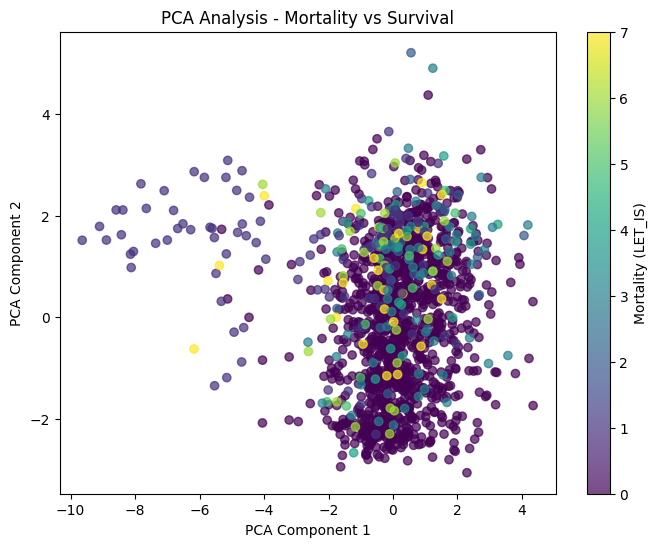

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'LET_IS' is the target variable (mortality: 1 or 0)
X = cleaned_data.drop(['AGE', 'LET_IS'], axis=1)  # Drop AGE and mortality (LET_IS)
y = cleaned_data['LET_IS']  # Mortality target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA components with color based on 'LET_IS' (mortality)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Analysis - Mortality vs Survival')
plt.colorbar(scatter, label='Mortality (LET_IS)')
plt.show()

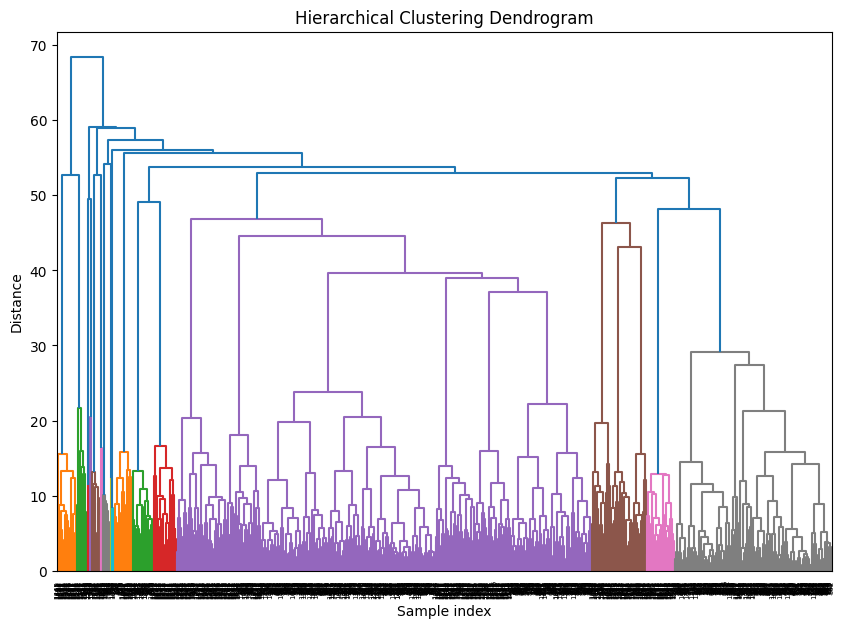

In [216]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming the target variable 'LET_IS' is to be excluded and 'AGE' is also not needed for clustering
X = cleaned_data.drop(['AGE', 'LET_IS'], axis=1)  # Drop AGE and mortality (LET_IS)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Hierarchical Clustering (linkage matrix)
linked = linkage(X_scaled, method='ward')  # 'ward' minimizes the variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()